### 1) Generate a complex sinusoid 
Complete the function cSine(A, k, phi, N, n), to generate a complex sinusoid. given its amplitude A, periodicity k, initial phase phi (radians), and number of samples (N).

In [30]:
### write your code here
#note that here we are creating complex sinusoid to examine difference between real and complex INPUT to a DFT function. 
#i.e. input can be complex with 1j, whereas DFT equation has -1j. 
import numpy as np

def cSine(k, N, A=1, phi=0):
    n = np.arange(0, N)
    c = np.exp(1j * 2 * np.pi * k * n/N)
    return(c)

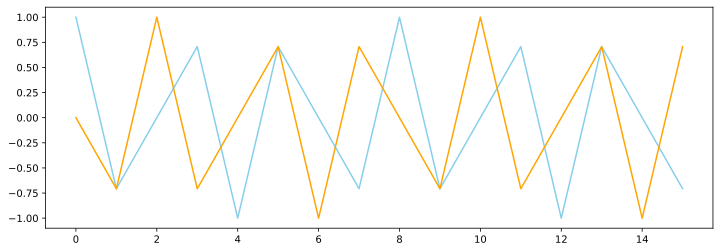

In [6]:
import matplotlib.pyplot as plt
a = cSine(7,64)
b = cSine(10,16)
plt.plot(b.real, 'skyblue', b.imag, 'orange')
#notice we get aliasing at |N-k| if k > N/2 (Nyquist)

### 2) Compose a DFT algorithm
WARNING! DO NOT USE ON ANYTHING WITH LENGTH LONGER THAN ONE SECOND! (Even shorter is recommended).  
Also: test with small values of k and N.

Complete the function DFT(x) so that it implements the discrete Fourier transform (DFT) for a given signal.  

Given an array x of length N, the function should return its DFT of length N, with the k indices (DFT coefficients) ranging from 0 to N - 1. The input argument to the function is a numpy array x and the function should return a numpy array X, which is the DFT of x. 


In [100]:
def DFT(x):
    """
    Input:
    x (numpy array) = input sequence of length N
    Output:
    The function should return a numpy array of length N
    X (numpy array) = The N point DFT of the input sequence x
    """
    
    ## Your code here
    x = np.array(x)
    N = len(x) 
    n = np.arange(0,N)

    X = np.array([])
    for k in range(N):
        s = np.exp(-1j * 2 * np.pi * k * n/N)
        X = np.append(X, sum(x*s))
    return X

In [101]:
#OR...
def myDFT(x):
    """
    Input:
    x (numpy array) = input sequence of length N
    Output:
    The function should return a numpy array of length N
    X (numpy array) = The N point DFT of the input sequence x
    """
    
    ## Your code here
    x = np.array(x)
    N = len(x) 
    n = np.arange(0,N)

    X = np.zeros(N, dtype=complex) 
    for k in range(N):
        s = np.exp(-1j * 2 * np.pi * k * n/N) #remember: n/N is like iterating over all samples over time
        X[k] = sum(x*s) #or: np.dot(x,s)
    return X

In [104]:
a = np.array([-1,1,-1,1])
DFT(a)

array([ 0.00000000e+00+0.00000000e+00j, -7.26747174e-17+1.11022302e-16j,
       -4.00000000e+00-7.34788079e-16j,  3.29046455e-16+4.44089210e-16j])

In [105]:
myDFT(a)


array([ 0.00000000e+00+0.00000000e+00j, -7.26747174e-17+1.11022302e-16j,
       -4.00000000e+00-7.34788079e-16j,  3.29046455e-16+4.44089210e-16j])

### 3) Modify the DFT function

Include a built-in graphing parameter that outputs the time-series of the original signal next to (or above) a graph of the magnitude spectrum. (Do NOT use matplotlib's `magnitude_spectrum` plot function).

(a) Plot the output of two different signals with k = integer value, and k = non-integer value (e.g., 7 and 7.5)

In [133]:
import numpy as np
import matplotlib.pyplot as plt

def DFT2(x, by=1):
    """
    Input:
    x (numpy array) = input sequence of length N
    Output:
    The function should return a numpy array of length N
    X (numpy array) = The N point DFT of the input sequence x
    """
    
    ## Your code here
    x = np.array(x)
    N = len(x) 
    n = np.arange(0,N)

    X = np.array([])
    for k in range(N):
        s = np.exp(-1j * 2 * np.pi * k * n/N)
        X = np.append(X, sum(x*s))
    
    #modifiy to output graph.
    fig, ax = plt.subplots(2,1)
    plt.setp(ax, xticks=np.arange(0,N,by))#this tells the x axis to plot x-ticks to match my array "n"
    ax[0].plot(x.real)
    ax[1].plot(np.abs(X))
    return (X) #if you want to omit the actual printing of vaules of X, simply save to a variable.

array([ 0.00000000e+00+0.00000000e+00j, -7.26747174e-17+1.11022302e-16j,
       -4.00000000e+00-7.34788079e-16j,  3.29046455e-16+4.44089210e-16j])

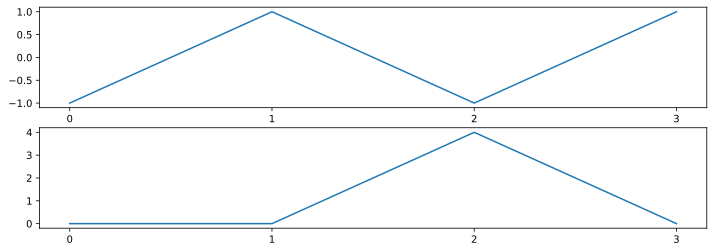

In [134]:
a = [-1,1,-1,1] #test with real-valued input, i.e., k=2
b = cSine(k=7,N=20) #test with complex input
DFT2(a)

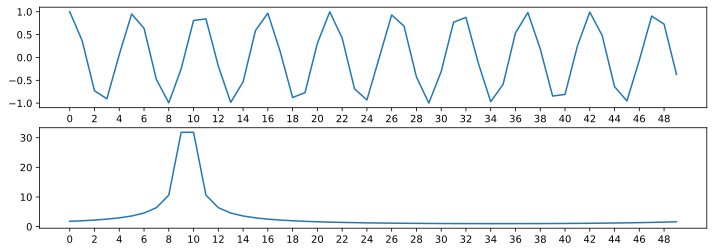

In [143]:
c = cSine(k=9.5,N=50) # k = non-integer value
p = DFT2(c, by=2)

(b) Visualize the DFT resolution by playing with the values of N (while holding k constant)  
[*Note: this 'resolution' is somewhat artificial at this point, we are merely zooming in or out.*]

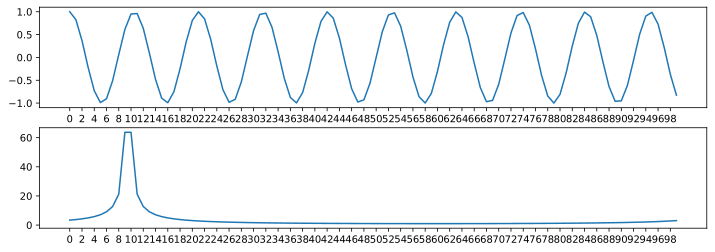

In [144]:
c = cSine(k=9.5,N=100) # k = non-integer value
p = DFT2(c, by=2)

### 4) Real-valued signals

Generate three different real-valued signals that you will pass to the DFT algorithm.
**These should all be a fraction of a second in length** and should be complex signals (i.e., they should have harmonics and not just a single fundamental).

You may use `np.scipy.signal` to generate different types of real-valued signals (e.g., sine, square, saw)

Pass each of these signals to the DFT and plot the magnitude spectrum of each.

In [147]:
import numpy as np
X = np.zeros(3,dtype=np.complex64)

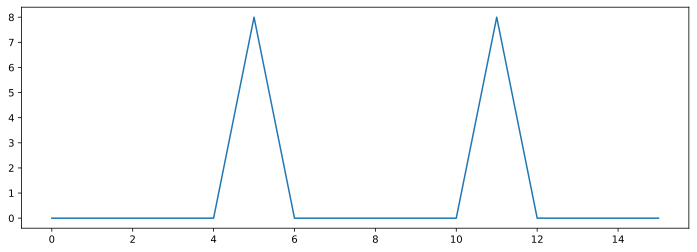

In [148]:
# first with real-valued simple tone input
N = 16
k = 5
n = np.arange(0,N)
e = np.cos(2*np.pi*k*n/N) #real-valued output (can use sin or cos, the magnitude will be the same)

X = DFT(e)
plt.plot(np.abs(X))

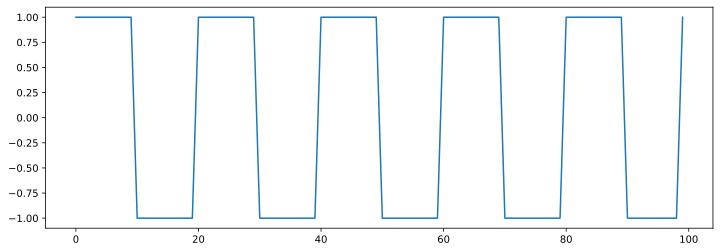

In [155]:
#now with square wave
from scipy import signal

t = np.linspace(0, 1, 100)
k = 5
s = signal.square(2 * np.pi * k * t)
plt.plot(s)

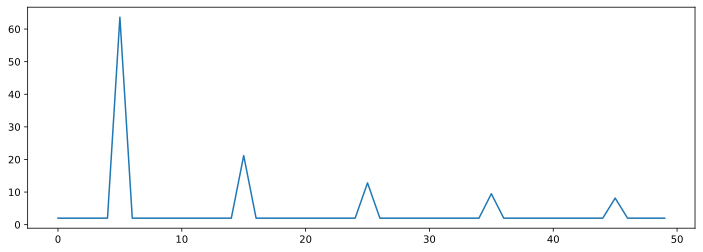

In [156]:
X = DFT(s)
plt.plot(np.abs(X)[:X.size//2])

Remember: this might look like a wave, but might be better represented with lines:

<StemContainer object of 3 artists>

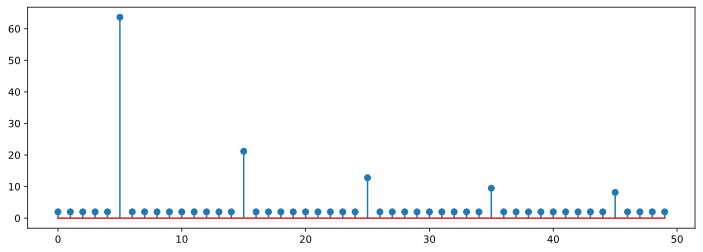

In [157]:
#same plot but using type "stem"
X = DFT(s)
plt.stem(np.abs(X)[:X.size//2])

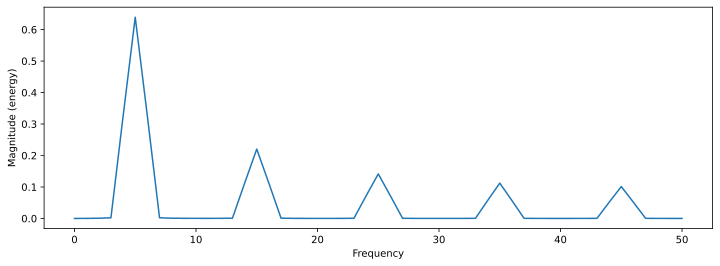

In [158]:
#check that our initial plot matches that of plt's magnitude_spectrum
N=100
plt.magnitude_spectrum(s, N); 

### 5) Compose an IDFT algorithm

Complete the function IDFT(X) so that it implements the inverse discrete Fourier transform (IDFT). Given a frequency spectrum X of length N, the function should return its IDFT x, also of length N. Assume that the frequency index of the input spectrum ranges from 0 to N - 1.

The input argument to the function is a numpy array X of the complex frequency spectrum and the function should return a numpy array x, the IDFT of X. Remember to scale the output appropriately.

In [159]:
def IDFT(X):
    """
    Input:
        X (numpy array) = frequency spectrum (length N)
    Output:
        The function should return a numpy array of length N 
        x (numpy array) = The IDFT of the frequency spectrum X with length N
    """
    ## Your code here
    #import numpy as np
    np.array([X]) if len(X) >= 1 else False
    N = len(X) if len(X) != 0 else False
    nv = np.arange(0, N)
    kv = np.arange(0, N)

    x = np.array([])
    for n in nv:
        s = np.exp(1j * 2 * np.pi * n/N * kv)
        x = np.append(x, 1.0/N * sum(X*s))

    return x

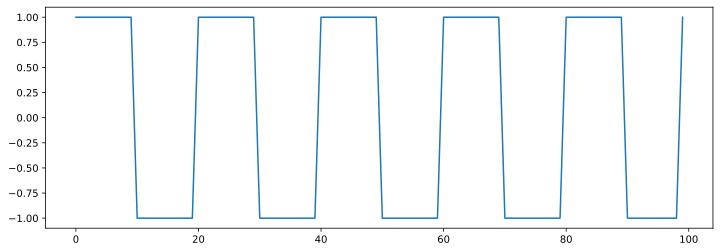

In [162]:
#test your function by passing in the output of your DFT function as input to your IDFT
orig = IDFT(DFT(s))
plt.plot(orig.real)